# Mathematical Underpinnings - Lab 1

## Task 1
### a) Generative approach 

We know $\pi = P(Y=1)$ and the distributions $f(x|Y=1)$ and $f(x|Y=-1)$.

#### First bullet point

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
# sampling from multivariate normal distribution and from Bernoulli

x = np.random.multivariate_normal(np.array([0,0]), np.eye(2), 5)
y = np.random.binomial(1, 0.5, 5)
x, y

(array([[ 1.24938051, -1.24646803],
        [-0.27943103,  0.91639305],
        [-0.63883106, -0.71057246],
        [-0.58276166, -0.05249042],
        [ 1.16375138, -3.46015006]]),
 array([0, 1, 0, 0, 0]))

In [4]:
m1 = np.array([1,1])
m2 = np.array([0,0])

sigma = np.array([[1, -0.5],[-0.5, 1]])

In [5]:
# sampling
Y_generative = np.array([1] * 500 + [-1] * 500)
X_generative = np.concatenate([np.random.multivariate_normal(m1, sigma, 500), np.random.multivariate_normal(m2, sigma, 500)])

Does the distribution of $P(Y=1|X=x)=p(y=1|x)$ correspond to a logistic model?

A hint: Use Bayes theorem to compute $p(y=1|x)$. Is it possible to represent $p(y=1|x)$ as $\frac{e^{\beta_0 + \beta x}}{1 + e^{\beta_0 + \beta x}}$?


Yes

In [6]:
B0_est = np.log(0.5 / (1 - 0.5)) + 1/2 * m2.T @ np.linalg.inv(sigma) @ m2 - 0.5 * m1.T @ np.linalg.inv(sigma) @ m1
B_est = np.linalg.inv(sigma) @ (m1 - m2)
B0_est, B_est

(-2.0, array([2., 2.]))

#### Second bullet point

Find the formulas for the parameters of the logistic model (the coefficients and the intercept).

A hint: Use the representation of $p(y=1|x)$ from the first bullet point and solve for $\beta_0$ and $\beta$.

In [7]:
# computing beta_0 and beta using the formulas

In [8]:
# a logistic model
mod_a = LogisticRegression(penalty=None)
mod_a.fit(X_generative, Y_generative)
(mod_a.intercept_, mod_a.coef_)

(array([-2.15243963]), array([[2.03882244, 2.09150046]]))

### b) Discriminative approach

We know $f(x)$ and $P(Y=1|X=x)$.

#### First bullet point

In [9]:
# sampling
n = 1000
B0 = -2
B1 = np.array([2, 2])

zeros_mask = np.random.binomial(1, 0.5, n).astype(bool)
x_1 = np.random.multivariate_normal(m1, sigma, zeros_mask.sum())
x_m_1 = np.random.multivariate_normal(m2, sigma, n - zeros_mask.sum())
X_disciminative = np.concatenate([x_1, x_m_1])

p = 1 / (1 + np.exp(- B0 - np.sum(B1 * X_disciminative, axis=-1)))
Y_discriminative =  np.where(np.random.binomial(1, p),  1, -1)

In [10]:
mod_b = LogisticRegression(penalty=None)
mod_b.fit(X_disciminative, Y_discriminative)

LogisticRegression(penalty=None)

In [11]:
(mod_b.intercept_, mod_b.coef_)

(array([-1.95327517]), array([[1.94980052, 1.86592068]]))

#### Second bullet point

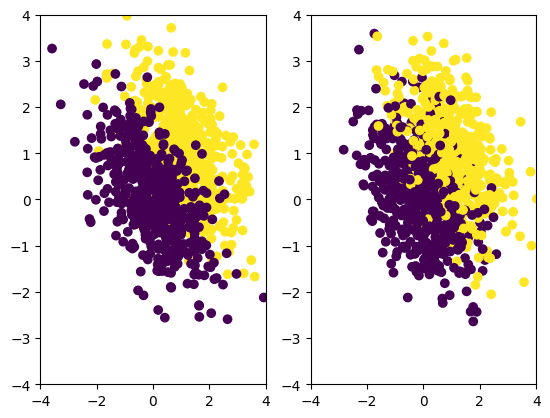

In [12]:
plt.subplot(1, 2, 1)
plt.scatter(X_generative[:, 0], X_generative[:, 1], c=Y_generative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.subplot(1, 2, 2)
plt.scatter(X_disciminative[:, 0], X_disciminative[:, 1] , c=Y_discriminative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.show()

What distinguishes the generative approach from the discriminative approach?

Based on the plots alone the distinctions of the methods are impossible.
todo: explain in more details

### c)

To sample from $f_{X|Y=-1}$, first, we will give an answer to Q1.

Q1. A hint: use Bayes theorem for $p(x|y=-1)$ and use law of total probability for $p(x)$.

$$ p(x|y=-1) = \frac{\pi \exp(-x)}{\exp(\beta_0+\beta_1 x)(1-\pi)}  = \frac{\pi}{1-\pi}\exp({-\beta_0})\exp({-(1+\beta_1)x})$$

$$ C_{\pi, \beta_0} = \frac{\pi}{1-\pi}exp({-\beta_0}) $$

The integral of the distribution equals to 1

$$C_{\pi, \beta_0} = (\beta_1+1)$$

$$ \beta_0 = log( \frac{\pi}{(1-\pi)(\beta_1+1)} ) $$

Given set values

$$\beta_0 = ln(C_\pi/(1+\beta_1))= ln(0.25)=-ln(4)$$

Answer Q1: $f_{X|Y=-1} \sim \exp(\beta_1+1)$

In [13]:
# sampling

beta1 = 1
n1 = 1000
x1 = np.random.exponential(1, size=n1)

n2 = 2000
x2 = np.random.exponential(1/(beta1 + 1), size=n2)
X = np.concatenate([x1, x2]).reshape(-1, 1)
y = np.concatenate([np.ones(n1), np.zeros(n2)])

In [14]:
# a model
mod = LogisticRegression(penalty=None)
mod.fit(X, y)
(mod.intercept_, mod.coef_)

(array([-1.39932291]), array([[1.02192116]]))

Q2, Q3. A hint: what is the distribution of $f_{X|Y=-1}$? What ia a norming constant?

Answer Q2: No. The intercept depends also on $\beta_1$.
Answer Q3: No. The intercept depends also on $\pi$.

If that is doable, given $\beta_1$ and $\pi$ compute $\beta_0$.

A hint: Of course it is, compute $\beta_0$.

In [15]:
beta1 = 1
pi_c = n1 / (n1 + n2)
-np.log((1 - pi_c)/pi_c * (beta1 + 1))

-1.3862943611198908

## Task 2

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

In [268]:
# def population_risk(a, sigma_eps):
#     return ...

### b)

In [269]:
# sampling

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [270]:
# def empirical_risk(a, x, y):
#     return ...

### c)

In [37]:
# code, plot

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [38]:
# excess risk
# ...

In [39]:
# simulations with fixed sample size

In [276]:
# simulations for various sample sizes

In [40]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)